<a href="https://colab.research.google.com/github/atul219/Track_Detect/blob/master/Track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone data from github
!git clone https://github.com/atul219/Track_Detect

fatal: destination path 'Track_Detect' already exists and is not an empty directory.


In [0]:
!ls Track_Detect

driving_log.csv  IMG  Track.ipynb


In [0]:
# libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D , Dropout, Flatten , Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

In [0]:
data_dir = 'Track_Detect'
columns = ['center' ,'left' ,'right' ,'steering' ,'throttle' , 'reverse' ,'speed' ]
data = pd.read_csv(os.path.join(data_dir , 'driving_log.csv') , names = columns)
pd.set_option('display.max_colwidth' , -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_752.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_752.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_752.jpg,0.0,0.0,0.0,0.000078
1,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_855.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_855.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_855.jpg,0.0,0.0,0.0,0.000079
2,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_963.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_963.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_963.jpg,0.0,0.0,0.0,0.000078
3,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_49_066.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_49_066.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_49_066.jpg,0.0,0.0,0.0,0.000081
4,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_49_168.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_49_168.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_49_168.jpg,0.0,0.0,0.0,0.000078


In [0]:
os.path.join(data_dir , 'driving_log.csv')

'Track_Detect/driving_log.csv'

In [0]:
# to trim the extra section or path in the colum of cneter , left and right
def path_leaf(path):
  head , tail = ntpath.split(path)
  
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left']= data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [0]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_02_07_01_24_48_752.jpg,left_2019_02_07_01_24_48_752.jpg,right_2019_02_07_01_24_48_752.jpg,0.0,0.0,0.0,0.000078
1,center_2019_02_07_01_24_48_855.jpg,left_2019_02_07_01_24_48_855.jpg,right_2019_02_07_01_24_48_855.jpg,0.0,0.0,0.0,0.000079
2,center_2019_02_07_01_24_48_963.jpg,left_2019_02_07_01_24_48_963.jpg,right_2019_02_07_01_24_48_963.jpg,0.0,0.0,0.0,0.000078
3,center_2019_02_07_01_24_49_066.jpg,left_2019_02_07_01_24_49_066.jpg,right_2019_02_07_01_24_49_066.jpg,0.0,0.0,0.0,0.000081
4,center_2019_02_07_01_24_49_168.jpg,left_2019_02_07_01_24_49_168.jpg,right_2019_02_07_01_24_49_168.jpg,0.0,0.0,0.0,0.000078


<BarContainer object of 25 artists>

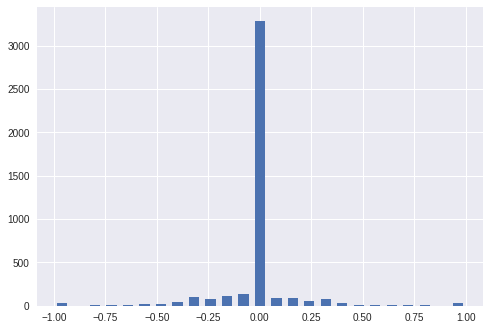

In [0]:
# plot steering angle for every image

# a) divide the bins
num_bins = 25
hist , bins = np.histogram(data['steering'] , num_bins)
# to center our data
center = (bins[:-1] + bins[1:]) * 0.5
#print(bins)
#print(center)
plt.bar(center , hist , width = 0.05)


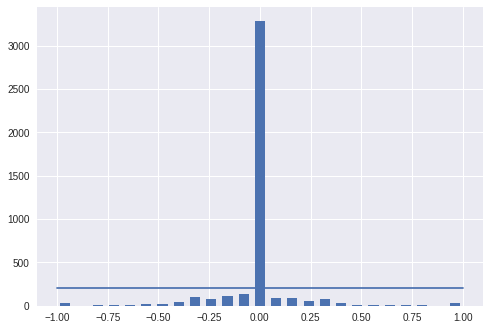

In [0]:
# this will make our network to be bias to drive at center so we will limit this a threshold
sample_per_bin = 200
plt.bar(center , hist , width = 0.05)
plt.plot((np.min(data['steering']) , np.max(data['steering'])), (sample_per_bin , sample_per_bin))

Total Data: 4280
Removed: 3083
Remaining Data: 1197


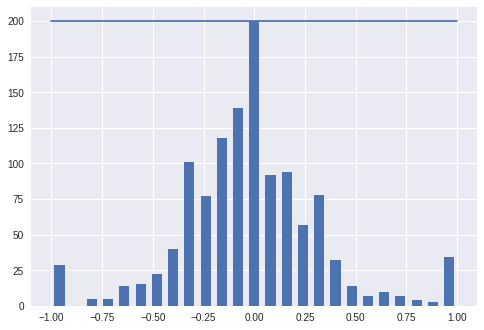

In [0]:
# to remove smaples
print("Total Data:" , len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[sample_per_bin:]
  remove_list.extend(list_)
    
    
print('Removed:' , len(remove_list))    
data.drop(data.index[remove_list] , inplace = True)
      
print("Remaining Data:" , len(data))
      
hist,_ = np.histogram(data['steering'] , (num_bins))
plt.bar(center , hist , width = 0.05)
plt.plot((np.min(data['steering']) , np.max(data['steering'])), (sample_per_bin , sample_per_bin))

In [0]:
print(data.iloc[1])
def load_img_steering(data_dir , df):
  img_path = []
  steering = []
  
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center , left , right = indexed_data[0] ,indexed_data[1] ,indexed_data[2]
    img_path.append(os.path.join(data_dir , center.strip()))
    steering.append(float(indexed_data[3]))
  
  img_path = np.asarray(img_path)
  steering = np.asarray(steering)
  
  return img_path , steering

img_path , steering = load_img_steering(data_dir + '/IMG' , data)

center      center_2019_02_07_01_24_50_402.jpg
left        left_2019_02_07_01_24_50_402.jpg  
right       right_2019_02_07_01_24_50_402.jpg 
steering   -0.210855                          
throttle    1                                 
reverse     0                                 
speed       4.59886                           
Name: 16, dtype: object


In [0]:
X_train, X_val ,y_train , y_val =  train_test_split(img_path , steering , test_size = 0.2 , random_state = 6)

Text(0.5, 1.0, 'Validation Set')

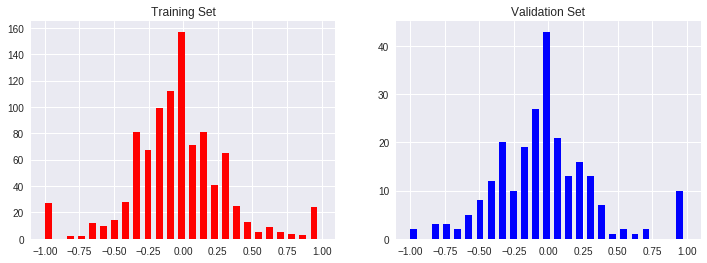

In [0]:
fig , axis = plt.subplots(1,2 , figsize = (12,4))
axis[0].hist(y_train , bins = num_bins , width = 0.05 , color = "red")
axis[0].set_title("Training Set")
axis[1].hist(y_val , bins = num_bins , width = 0.05 , color = "Blue")
axis[1].set_title("Validation Set")

Preprocessing Images

In [0]:
def img_preprocessing(img):
  img = plt.imread(img)
  # crop the height of image and just show the lane path
  img = img[60:135,:,:]
  # color space
  img = cv2.cvtColor(img , cv2.COLOR_BGR2YUV)
  # add gaussian blur
  img = cv2.GaussianBlur(img , (3,3),0)
  # resize
  img = cv2.resize(img , (200,66))
  # mormalize
  img = img/255
  
  return img

Text(0.5, 1.0, 'Preprocessed Image')

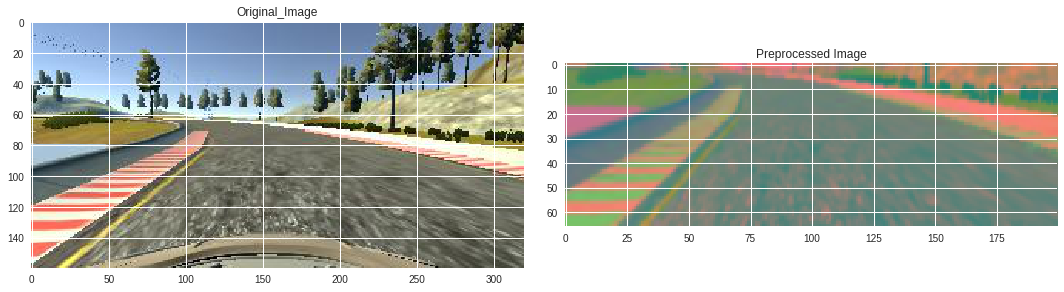

In [0]:
image = img_path[100]
original_image = plt.imread(image)
preprocessed_img = img_preprocessing(image)

fig , axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original_Image')
axs[1].imshow(preprocessed_img)
axs[1].set_title('Preprocessed Image')

In [0]:
# complete preprocess data
X_train = np.array(list(map(img_preprocessing , X_train)))
X_val = np.array(list(map(img_preprocessing , X_val)))

In [0]:
# Nvidia Model
def nvidia_model():
  
  model = Sequential()
  
  # 24 filter of 5*5
  model.add(Convolution2D(24,5,5,subsample = (2,2), input_shape = (66,200,3) , activation = 'elu'))
  model.add(Convolution2D(36,5,5, subsample = (2,2) , activation = 'elu'))
  model.add(Convolution2D(48,5,5, subsample = (2,2) , activation = 'elu'))
  model.add(Convolution2D(64,3,3 , activation = 'elu'))
  model.add(Convolution2D(64,3,3 , activation = 'elu'))
  
  model.add(Dropout(0.5))
  
  model.add(Flatten())

  
  model.add(Dense(100 , activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))

  optimizer = Adam(lr = 0.001)
  model.compile(loss = 'mse' , optimizer = optimizer)
  
  return model
  

In [0]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
__________

In [0]:
history = model.fit(X_train ,y_train ,epochs = 30 , validation_data = (X_val,y_val) , batch_size = 100 , verbose = 1, shuffle = True)

Train on 957 samples, validate on 240 samples
Epoch 1/30
957/957 [==============================] - 2s 2ms/step - loss: 0.6998 - val_loss: 0.1274
Epoch 2/30
957/957 [==============================] - 1s 676us/step - loss: 0.2788 - val_loss: 0.1199
Epoch 3/30
957/957 [==============================] - 1s 678us/step - loss: 0.1822 - val_loss: 0.1145
Epoch 4/30
957/957 [==============================] - 1s 664us/step - loss: 0.1695 - val_loss: 0.1131
Epoch 5/30
957/957 [==============================] - 1s 675us/step - loss: 0.1388 - val_loss: 0.1112
Epoch 6/30
957/957 [==============================] - 1s 670us/step - loss: 0.1499 - val_loss: 0.1118
Epoch 7/30
957/957 [==============================] - 1s 675us/step - loss: 0.1295 - val_loss: 0.1153
Epoch 8/30
957/957 [==============================] - 1s 660us/step - loss: 0.1276 - val_loss: 0.1120
Epoch 9/30
957/957 [==============================] - 1s 674us/step - loss: 0.1207 - val_loss: 0.1074
Epoch 10/30
957/957 [=================

Text(0.5, 0, 'epochs')

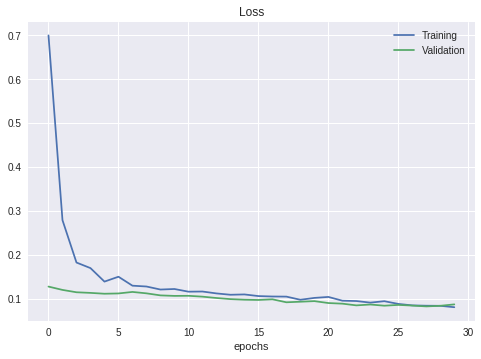

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training' , 'Validation'])
plt.title('Loss')
plt.xlabel('epochs')

In [0]:
model.save('model.h5')

In [0]:
# to download the file
from google.colab import files

files.download('model.h5')